# <center><strong>Bank Customer Churn BClassification</strong></center>
--------------------------------


#### **By Mohamed Jamyl**

http://linkedin.com/in/mohamed-jamyl

https://www.kaggle.com/mohamedjamyl

https://github.com/Mohamed-Jamyl

-------------------------

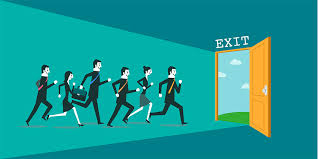

In [129]:
from IPython.display import Image
Image(filename='Bank.jpeg')

--------------------------------
--------------------------------
--------------------------------

## **Import Libraries**


In [191]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from pickle import dump
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

---------------------------------------
---------------------------------------
---------------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

-------------------------

In [131]:
df = pd.read_csv("bank customer churn dataset.csv")

In [132]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [133]:
df.shape

(10000, 14)

In [134]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [136]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [137]:
df.duplicated().sum()

np.int64(0)

------------------------
------------------------
### **Data Cleaning**
------------------------

In [138]:
df.rename(columns={'HasCrCard': 'Has credit card','IsActiveMember':'Is Active Member','CreditScore':'Credit Score',
                   'NumOfProducts':'Number Of Products','EstimatedSalary':'Estimated Salary','Exited':'Churned'} ,inplace=True)

In [139]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)

-----------------------------------------
-----------------------------------------

### **Basic Statistical Overview**
-------------------------------------------
- Summary Statistical : **describe()**

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit Score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Number Of Products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
Has credit card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
Is Active Member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Estimated Salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Churned,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


--------------------------------

- Summary Statistical : **value_counts()**
----------------------

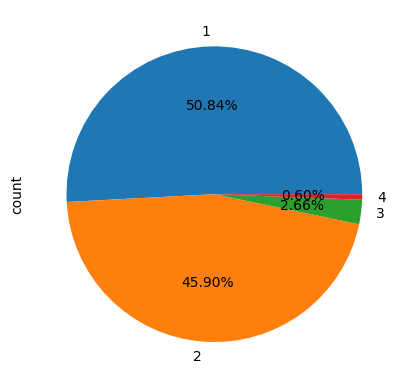

In [141]:
df['Number Of Products'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

-----------------------------------

C:\Users\RPC\AppData\Local\Temp\ipykernel_13732\1213901015.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data=df, palette=['green','blue','yellow'])


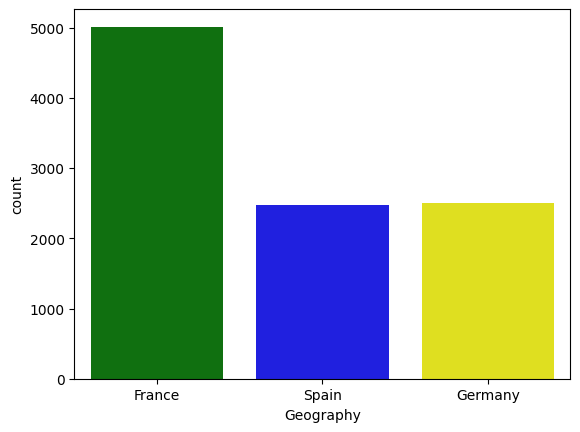

In [142]:
sns.countplot(x='Geography', data=df, palette=['green','blue','yellow'])
plt.show()

-----------------------------------

C:\Users\RPC\AppData\Local\Temp\ipykernel_13732\457633866.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Has credit card', data=df, palette=['green','blue'])


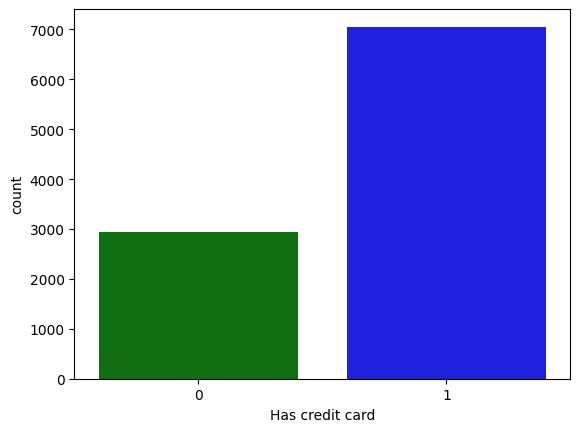

In [143]:
sns.countplot(x='Has credit card', data=df, palette=['green','blue'])    
plt.show()

-----------------------------------

C:\Users\RPC\AppData\Local\Temp\ipykernel_13732\2796008230.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is Active Member', data=df, palette=['orange','yellow'])


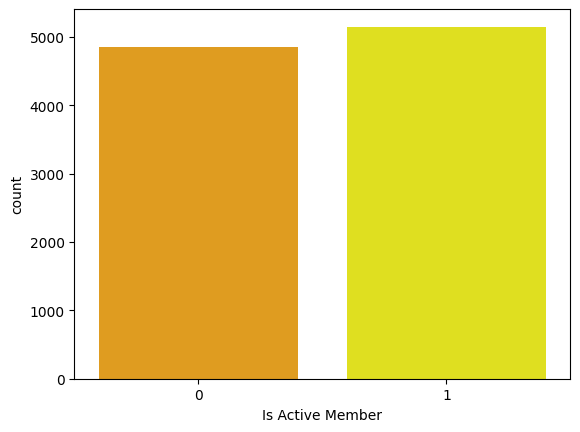

In [144]:
sns.countplot(x='Is Active Member', data=df, palette=['orange','yellow'])
plt.show()

-----------------------------------

C:\Users\RPC\AppData\Local\Temp\ipykernel_13732\3427317816.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=['pink','blue'])


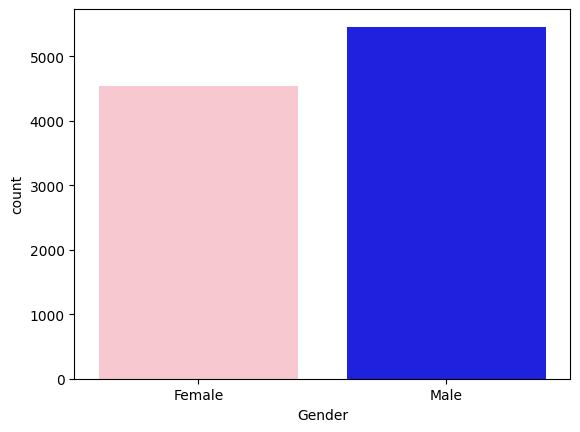

In [145]:
sns.countplot(x='Gender', data=df, palette=['pink','blue'])
plt.show()

-----------------------------------

C:\Users\RPC\AppData\Local\Temp\ipykernel_13732\1772317120.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churned', data=df, palette=['green','red'])


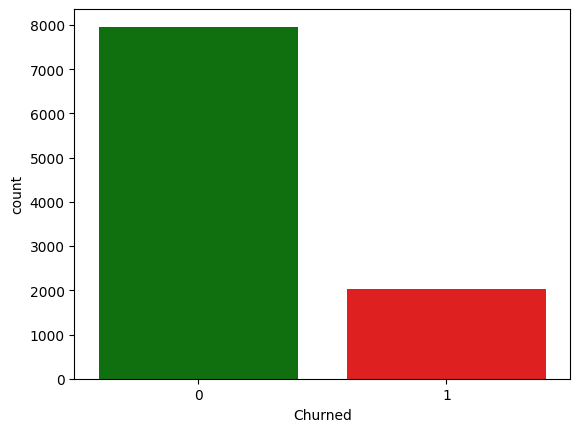

In [146]:
sns.countplot(x='Churned', data=df, palette=['green','red'])
plt.show()

---------------------------------------
---------------------------------------

### **Distribution of Variables**
--------------------------
- **Numerical Features (KDE)**

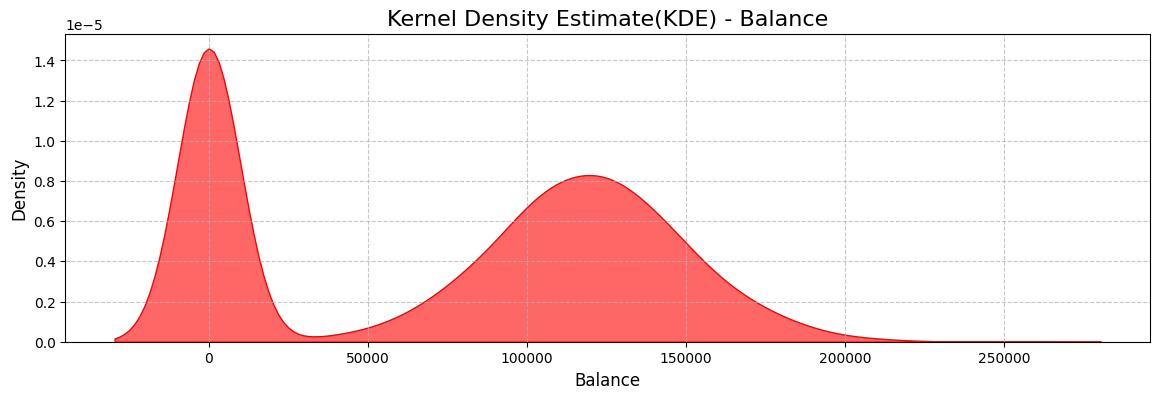

In [147]:
plt.figure(figsize=(14,	4))
sns.kdeplot(df['Balance'], fill=True,	color='red', alpha=0.6)
plt.title('Kernel Density Estimate(KDE) - Balance',	fontsize=16)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- ##### **First Peak:** The first and smaller peak is located at a balance of approximately 0. This suggests a high density of individuals with little to no balance.

- ##### **Second Peak:** The second and larger peak is centered around a balance of roughly 120,000. This indicates another significant group of individuals with balances clustering around this higher value.
--------------------------

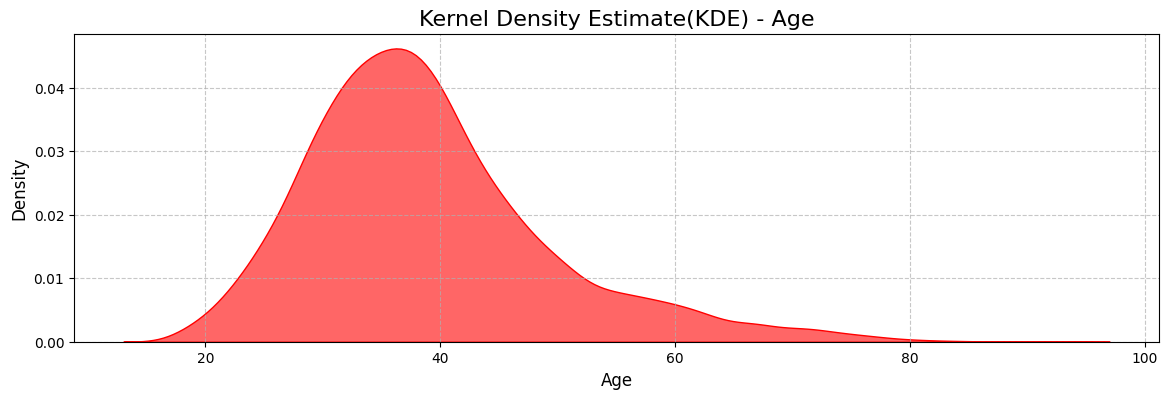

In [148]:
plt.figure(figsize=(14,	4))
sns.kdeplot(df['Age'], fill=True,	color='red', alpha=0.6)
plt.title('Kernel Density Estimate(KDE) - Age',	fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- ##### **The plot reveals a positively skewed distribution (also known as right-skewed). This means the tail of the distribution extends to the right, indicating that while most of the data points are clustered on the left side, there's a smaller number of individuals at older ages.**

- ##### **The distribution has a single peak, or mode, which is the most frequent age range. The highest density of individuals is found around the age of 40. The density decreases sharply after the peak, with a long, gradual decline towards the older ages, extending to nearly 100. The density of individuals at younger ages (below 20) is very low.**
-----------------------------------

### **Checking Correlation between the features**

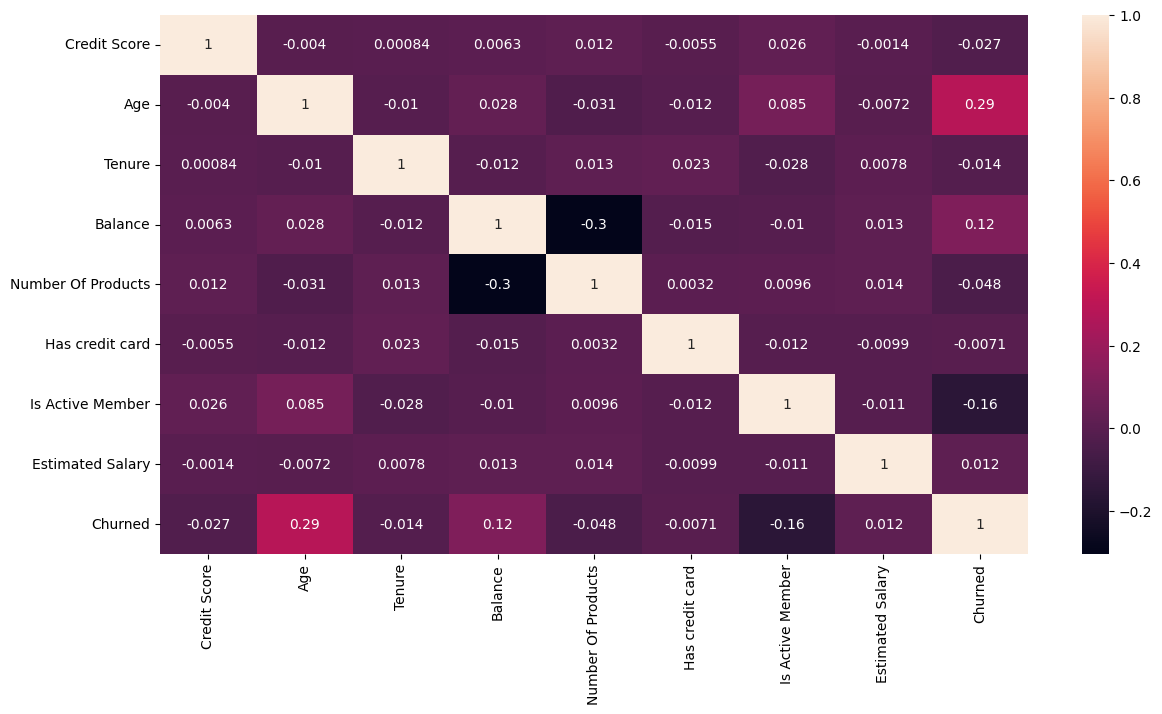

In [149]:
plt.figure(figsize=(14,	7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

- ##### There is a **normal positive correlation (0.3)** between **Age** and **Exited** 
- ##### There is a **normal negative correlation (-0.3)** between **Balance** and **Number Of Products** 


------------------------------------------
------------------------------------------

## **Feature Extraction**

-----------------------------

In [150]:
def ageGroup(age):
    age = int(age)
    if age <= 40:
        return 'Young Adults'
    elif age > 40 and age < 60:
        return 'Middle-aged Adults'
    else :
        return 'Old Adults'
    
df['Age group'] = df['Age'].apply(lambda x : ageGroup(x))

In [151]:
df['Age group'].value_counts()

Age group
Young Adults          6419
Middle-aged Adults    3055
Old Adults             526
Name: count, dtype: int64

----------------------------------

In [152]:
def balanceGroup(balance):
    balance = float(balance)
    if balance > 0:
        return 'Funded account'
    elif balance == 0:
        return 'Empty account'
    else:
        return 'Overdrawn account'

df['Balance category'] = df['Balance'].apply(lambda x : balanceGroup(x))

In [153]:
df['Balance category'].value_counts()

Balance category
Funded account    6383
Empty account     3617
Name: count, dtype: int64

-----------------------------

In [154]:
def activeGroup(actAcc):
    actAcc = int(actAcc)
    if actAcc == 1:
        return 'Active account'
    else:
        return 'Dormant account'

df['Is Active Member'] = df['Is Active Member'].apply(lambda x : activeGroup(x))

In [155]:
df['Is Active Member'].value_counts()

Is Active Member
Active account     5151
Dormant account    4849
Name: count, dtype: int64

------------------------------------

In [156]:
def cardGroup(card):
    card = int(card)
    if card == 1:
        return 'Has a card'
    else:
        return 'No'

df['Has credit card'] = df['Has credit card'].apply(lambda x : cardGroup(x))

In [157]:
df['Has credit card'].value_counts()

Has credit card
Has a card    7055
No            2945
Name: count, dtype: int64

--------------------------------

In [158]:
def categorize_credit(score):
    if score < 580:
        return 'Poor'
    elif score < 670:
        return 'Fair'
    elif score < 740:
        return 'Good'
    elif score < 800:
        return 'Very Good'
    else:
        return 'Excellent'

df['Credit Score Category'] = df['Credit Score'].apply(categorize_credit)

In [159]:
df['Credit Score Category'].value_counts()

Credit Score Category
Fair         3331
Good         2428
Poor         2362
Very Good    1224
Excellent     655
Name: count, dtype: int64

-----------------------

In [160]:
def Churned(exit):
    exit = int(exit)
    if exit == 1:
        return 'Exited'
    else:
        return 'Stayed'

df['Churned'] = df['Churned'].apply(lambda x : Churned(x))

In [161]:
df['Churned'].value_counts()

Churned
Stayed    7963
Exited    2037
Name: count, dtype: int64

-----------------------

In [162]:
def categorize_Estimated_Salary(Salary):
    if Salary < 50000:
        return 'Low Salary'
    elif Salary < 100000:
        return 'Medium Salary'
    elif Salary < 150000:
        return 'High Salary'
    else:
        return 'Very High Salary'

df['Estimated Salary Category'] = df['Estimated Salary'].apply(categorize_Estimated_Salary)

In [163]:
df['Estimated Salary Category'].value_counts()

Estimated Salary Category
High Salary         2555
Medium Salary       2537
Very High Salary    2455
Low Salary          2453
Name: count, dtype: int64

------------------------------------

In [164]:
df['BalanceSalaryRatio'] = df['Balance'] / df['Estimated Salary']

In [165]:
df[['Balance', 'Estimated Salary', 'BalanceSalaryRatio']].head()

,Balance,Estimated Salary,BalanceSalaryRatio
0,0.00,101348.88,0.000000
1,83807.86,112542.58,0.744677
2,159660.80,113931.57,1.401375
3,0.00,93826.63,0.000000
4,125510.82,79084.10,1.587055


In [166]:
#df.to_excel('bank customer churn new dataset.xlsx',index=False)

----------------------------
----------------------------


## **Transform data**

------------------------------

In [167]:
df.columns

Index(['Credit Score', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'Number Of Products', 'Has credit card', 'Is Active Member',
       'Estimated Salary', 'Churned', 'Age group', 'Balance category',
       'Credit Score Category', 'Estimated Salary Category',
       'BalanceSalaryRatio'],
      dtype='object')

In [168]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Geography                  10000 non-null  object
 1   Gender                     10000 non-null  object
 2   Has credit card            10000 non-null  object
 3   Is Active Member           10000 non-null  object
 4   Churned                    10000 non-null  object
 5   Age group                  10000 non-null  object
 6   Balance category           10000 non-null  object
 7   Credit Score Category      10000 non-null  object
 8   Estimated Salary Category  10000 non-null  object
dtypes: object(9)
memory usage: 703.3+ KB


In [169]:
df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain':2})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Has credit card'] = df['Has credit card'].map({'No': 0, 'Has a card': 1})
df['Is Active Member'] = df['Is Active Member'].map({'Dormant account': 0, 'Active account': 1})
df['Churned'] = df['Churned'].map({'Stayed': 0, 'Exited': 1})
df['Age group'] = df['Age group'].map({'Young Adults': 0, 'Middle-aged Adults': 1,'Old Adults': 2})
df['Balance category'] = df['Balance category'].map({'Empty account': 0, 'Funded account': 1})
df['Credit Score Category'] = df['Credit Score Category'].map({'Poor': 0, 'Fair': 1,'Good' : 2,'Very Good':3,'Excellent':4})
df['Estimated Salary Category'] = df['Estimated Salary Category'].map({'Low Salary': 0, 'Medium Salary': 1,'High Salary' : 2,'Very High Salary':3})

In [170]:
df.head()

,Credit Score,Geography,Gender,Age,Tenure,Balance,Number Of Products,Has credit card,Is Active Member,Estimated Salary,Churned,Age group,Balance category,Credit Score Category,Estimated Salary Category,BalanceSalaryRatio
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,0,1,2,0.000000
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,1,1,2,0.744677
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,1,0,2,1.401375
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,0,2,1,0.000000
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1,1,4,1,1.587055


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Credit Score               10000 non-null  int64  
 1   Geography                  10000 non-null  int64  
 2   Gender                     10000 non-null  int64  
 3   Age                        10000 non-null  int64  
 4   Tenure                     10000 non-null  int64  
 5   Balance                    10000 non-null  float64
 6   Number Of Products         10000 non-null  int64  
 7   Has credit card            10000 non-null  int64  
 8   Is Active Member           10000 non-null  int64  
 9   Estimated Salary           10000 non-null  float64
 10  Churned                    10000 non-null  int64  
 11  Age group                  10000 non-null  int64  
 12  Balance category           10000 non-null  int64  
 13  Credit Score Category      10000 non-null  int6

---------------------------------
---------------------------------
---------------------------------

### **Spliting Data to train and test**

-------------------------

In [172]:
x = df.drop('Churned', axis=1)
y = df['Churned']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.85 , random_state=1234)

In [173]:
print(f'shape of x_train : {x_train.shape}')
print(f'shape of x_test : {x_test.shape}')
print('-------------------------------')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_test : {y_test.shape}')

shape of x_train : (8500, 15)
shape of x_test : (1500, 15)
-------------------------------
shape of y_train : (8500,)
shape of y_test : (1500,)


-------------------------
-------------------------
### **Feature Scaling**
-------------------------

In [174]:
scaler = StandardScaler()

x_train[['Credit Score','Age','Balance','Estimated Salary']] = scaler.fit_transform(x_train[['Credit Score','Age','Balance','Estimated Salary']])
x_test[['Credit Score','Age','Balance','Estimated Salary']] = scaler.fit_transform(x_test[['Credit Score','Age','Balance','Estimated Salary']])

In [175]:
x_train.head()

,Credit Score,Geography,Gender,Age,Tenure,Balance,Number Of Products,Has credit card,Is Active Member,Estimated Salary,Age group,Balance category,Credit Score Category,Estimated Salary Category,BalanceSalaryRatio
4124,0.280911,0,1,-1.236723,5,0.556611,1,1,0,-0.687605,0,1,2,1,1.823527
4502,0.486880,2,1,0.572678,5,1.410368,1,1,0,0.723905,1,1,2,2,1.158350
898,-1.315348,0,0,0.096520,2,0.425950,1,1,0,0.492780,0,1,0,2,0.800045
3305,1.393144,0,0,2.191617,8,-1.222669,1,1,1,1.137324,2,0,3,3,0.000000
3531,-2.499670,0,0,4.286714,8,0.184279,1,0,0,1.534182,2,1,0,3,0.466210


-------------------------------------------
-------------------------------------------

## **Creating Model**

------------------------

In [176]:
df

,Credit Score,Geography,Gender,Age,Tenure,Balance,Number Of Products,Has credit card,Is Active Member,Estimated Salary,Churned,Age group,Balance category,Credit Score Category,Estimated Salary Category,BalanceSalaryRatio
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,0,1,2,0.000000
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,1,1,2,0.744677
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,1,0,2,1.401375
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,0,2,1,0.000000
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1,1,4,1,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,0,3,1,0.000000
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,1,0,2,0.564108
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,0,0,2,0,0.000000
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,1,3,1,0.808230


-----------------------------
### **Finding the best threshold**
-----------------------------

In [177]:
models = [
    LogisticRegression(
        penalty='l2',           # 'l1', 'l2', 'elasticnet', or 'none'
        C=1.0,                  # Inverse of regularization strength (smaller = stronger regularization)
        solver='lbfgs',         # 'lbfgs', 'liblinear', 'saga', …
        # class_weight='balanced',      # {class_label: weight} or 'balanced'
        max_iter=100,           # Increase if convergence warning
        random_state=None ),

    GaussianNB(
        var_smoothing=1e-9,     # Additive smoothing to variance
        priors=None             # Prior probabilities for classes
    ),

    SVC(
        C=1.0,                  # Regularization parameter
        kernel='sigmoid',       # 'linear', 'poly', 'rbf', 'sigmoid'
        degree=0,               # Degree for 'poly'
        gamma='scale',          # Kernel coefficient
        #class_weight= weights,  # 'balanced' or dict
        probability=False,      # True if you want predict_proba
        random_state=None
    ),

    RandomForestClassifier(
        n_estimators=100,       # Number of trees
        criterion='gini',       # 'gini' or 'entropy'
        max_depth=None,         # Depth of trees
        min_samples_split=2,    # Min samples to split a node
        min_samples_leaf=1,     # Min samples at leaf
        max_features='sqrt',    # 'auto', 'sqrt', 'log2' or int/float
        #class_weight=weights,      # 'balanced' or dict
        bootstrap=True,
        random_state=None
    ),

    DecisionTreeClassifier(
        criterion='gini',       # 'gini' or 'entropy'
        splitter='best',        # 'best' or 'random'
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=None,
        #class_weight=weights,      # 'balanced' or dict
        random_state=None
    ),

    KNeighborsClassifier(
        n_neighbors=5,          # Number of neighbors (k)
        weights='uniform',      # 'uniform' or 'distance'
        algorithm='auto',       # 'auto', 'ball_tree', 'kd_tree', 'brute'
        leaf_size=30,
        p=2,                    # 1 = Manhattan, 2 = Euclidean
        metric='minkowski'
    ),
     
    XGBClassifier(
        n_estimators=100,       # Number of boosting rounds (trees)
        learning_rate=0.1,      # Shrinkage (eta)
        max_depth=3,            # Depth of trees
        subsample=1.0,          # Subsampling of rows
        colsample_bytree=1.0,   # Subsampling of features per tree
        gamma=0,                # Minimum loss reduction to make a split
        min_child_weight=1,     # Min sum of instance weight per child
        scale_pos_weight=3.91,     # Weight for positive class (important for imbalance)
        reg_alpha=0,            # L1 regularization
        reg_lambda=1,           # L2 regularization
        random_state=None ),
    
    # LightGBM
    LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,                 # -1 = no limit
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        #class_weight='balanced',      # built-in balancing
        random_state=42)
]

In [178]:
def best_threshold_roc(model, x_train, y_train, x_test, y_test):

    model.fit(x_train, y_train)
    # get probabilities
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_probs = model.decision_function(x_test)
    else:
        raise ValueError("Model does not support probability or decision_function.")
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Youden’s J statistic
    J = tpr - fpr
    best_idx = np.argmax(J)
    best_t = thresholds[best_idx]
    
    auc = roc_auc_score(y_test, y_probs)
    
    print(f"Model = {model}")
    print(f"ROC-AUC = {auc:.3f}")
    print(f"Best ROC threshold = {best_t:.3f}")
    print(f"TPR = {tpr[best_idx]:.3f}, FPR = {fpr[best_idx]:.3f}")
    
    return best_t, auc


In [179]:
def predict_with_threshold(model, x_train, y_train, x_test, threshold):
    model = model.fit(x_train, y_train)
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_probs = model.decision_function(x_test)
    else:
        raise ValueError("Model does not support probability outputs.")
    
    return (y_probs >= threshold).astype(int)

------------------------------

In [180]:
best_threshold_roc(models[0], x_train, y_train, x_test, y_test)

Model = LogisticRegression()
ROC-AUC = 0.749
Best ROC threshold = 0.234
TPR = 0.622, FPR = 0.235


C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(np.float64(0.23402304129077633), np.float64(0.7491747462805562))

In [181]:
y_pred_ls = predict_with_threshold(models[0], x_train, y_train, x_test, threshold=0.6)    
print("Classification Report:\n", classification_report(y_test, y_pred_ls))
print('confusion matrix:\n' , confusion_matrix(y_test, y_pred_ls))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1193
           1       0.66      0.07      0.13       307

    accuracy                           0.80      1500
   macro avg       0.73      0.53      0.51      1500
weighted avg       0.78      0.80      0.73      1500

confusion matrix:
 [[1181   12]
 [ 284   23]]


C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------------

In [182]:
best_threshold_roc(models[3], x_train, y_train, x_test, y_test)

Model = RandomForestClassifier()
ROC-AUC = 0.839
Best ROC threshold = 0.310
TPR = 0.642, FPR = 0.125


(np.float64(0.31), np.float64(0.8389628970296328))

In [183]:
y_pred_rf = predict_with_threshold(models[3],x_train, y_train, x_test, threshold=0.230)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print('confusion matrix:\n' , confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      1193
           1       0.47      0.72      0.57       307

    accuracy                           0.78      1500
   macro avg       0.69      0.76      0.71      1500
weighted avg       0.83      0.78      0.79      1500

confusion matrix:
 [[941 252]
 [ 85 222]]


-----------------------

In [184]:
best_threshold_roc(models[5], x_train, y_train, x_test, y_test)

Model = KNeighborsClassifier()
ROC-AUC = 0.735
Best ROC threshold = 0.200
TPR = 0.788, FPR = 0.433


(np.float64(0.2), np.float64(0.7348171063014164))

In [185]:
y_pred_knc = predict_with_threshold(models[5], x_train, y_train, x_test, threshold=0.20)
print("Classification Report:\n", classification_report(y_test, y_pred_knc))
print('confusion matrix:\n' , confusion_matrix(y_test, y_pred_knc))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.57      0.70      1193
           1       0.32      0.79      0.45       307

    accuracy                           0.61      1500
   macro avg       0.62      0.68      0.58      1500
weighted avg       0.79      0.61      0.65      1500

confusion matrix:
 [[677 516]
 [ 65 242]]


--------------------------

In [186]:
best_threshold_roc(models[6],x_train, y_train, x_test, y_test)

Model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
ROC-AUC = 0.856
Best ROC threshold = 0.398
TPR = 0.821, FPR = 0.287


(np.float32(0.39780703), np.float64(0.8557300867437904))

In [187]:
y_pred_xgb = predict_with_threshold(models[6], x_train, y_train, x_test, threshold=0.398)
print("Classification Report:\n", classification_report(y_test, y_pred_knc))
print('confusion matrix:\n' , confusion_matrix(y_test, y_pred_knc))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.57      0.70      1193
           1       0.32      0.79      0.45       307

    accuracy                           0.61      1500
   macro avg       0.62      0.68      0.58      1500
weighted avg       0.79      0.61      0.65      1500

confusion matrix:
 [[677 516]
 [ 65 242]]


-------------------------------

In [188]:
best_threshold_roc(models[7], x_train, y_train, x_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1730, number of negative: 6770
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 8500, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203529 -> initscore=-1.364380
[LightGBM] [Info] Start training from score -1.364380
Model = LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=500,
               random_state=42, subsample=0.8)
ROC-AUC = 0.845
Best ROC threshold = 0.215
TPR = 0.691, FPR = 0.158


(np.float64(0.21527418087887742), np.float64(0.8449888191431558))

In [189]:
y_pred_knc = predict_with_threshold(models[7], x_train, y_train, x_test, threshold=0.215)
print("Classification Report:\n", classification_report(y_test, y_pred_knc))
print('confusion matrix:\n' , confusion_matrix(y_test, y_pred_knc))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1730, number of negative: 6770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 8500, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203529 -> initscore=-1.364380
[LightGBM] [Info] Start training from score -1.364380
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88      1193
           1       0.53      0.69      0.60       307

    accuracy                           0.81      1500
   macro avg       0.72      0.77      0.74      1500
weighted avg       0.84      0.81      0.82      1500

confusion matr

--------------------------------

In [ ]:
# saving model
# with open('LGBMClassifier_model.pkl' , 'wb') as f :
#     dump(models[7], f)

---------------------------


# <center><strong>Conclusion</strong></center>
--------------------------------------------
#### **This project on Bank Customer Churn allowed us to explore the data and identify the most influential factors affecting customer decisions, such as tenure, contract type, income level, and the use of additional services. Machine learning models were built to predict the likelihood of churn, providing accurate insights that help management identify at-risk customers and take proactive measures to retain them. This highlights the practical value of data analysis and artificial intelligence in supporting business decisions, strengthening customer loyalty, and ensuring sustainable growth for the financial institution.**

---------------------------------------

In [ ]:
# !jupyter nbconvert --to html "Bank Customer Churn BClassification.ipynb"

[NbConvertApp] Converting notebook Bank Customer Churn BClassification.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 763470 bytes to Bank Customer Churn BClassification.html
